In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
def model(num_obs = 100):
    X = np.random.rand(num_obs,2) * 10
    y = X[:,0] + X[:,1] < 10
    sns.scatterplot(X[:,0],X[:,1], hue=y)
    
    lr = LogisticRegression()
    lr = lr.fit(X, y)
    return lr, X, y

def plot_decision_boundary(lr, X, y):
    a1 = lr.coef_[0][0]
    a2 = lr.coef_[0][1]
    b = lr.intercept_[0]
    x1_start = 0
    x1_end = -1 * b / a1
    x2_start = -1 * b / a2
    x2_end = 0
    sns.scatterplot(X[:,0],X[:,1], hue=y)
    plt.plot([x1_start,x1_end],[x2_start,x2_end], color='red')

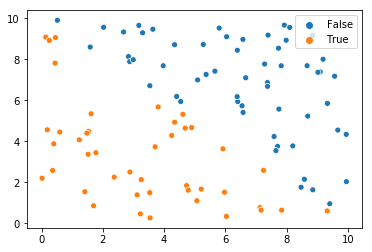

In [3]:
lr, X, y = model(100)

Decision boundary is hyperplane at which Z = 0.  In this case we are in 2-D space, therefore will be a line.  Z = a1x1 + a2x2 + b.  Solving for Z = 0: a2x2 = -a1x1 - b.  x2 = (-a1x1 - b) / a2

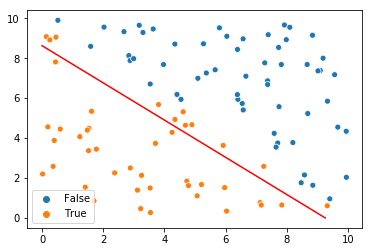

In [4]:
plot_decision_boundary(lr, X, y)

In [5]:
print(accuracy_score(lr.predict(X),y))

0.89


With only 100 points, our logistic regression function achieves limited accuracy (89% on this run, varies between high 80s and mid 90s).  This is interesting as our datasets contains no noise and our labels are defined by a linear function; therefore, the logistic regressor should be able to learn a linear function which perfectly separates the data.  Let's try adding more data

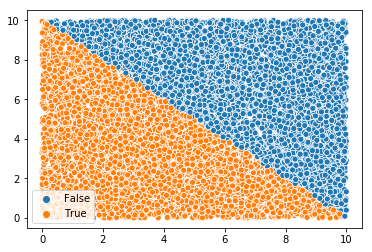

In [6]:
lr, X, y = model(10000)

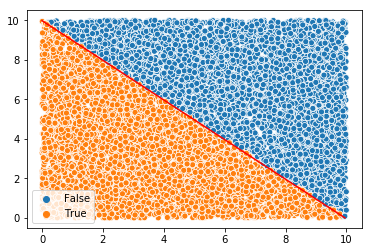

In [7]:
plot_decision_boundary(lr, X, y)

In [8]:
print(accuracy_score(lr.predict(X),y))

0.9967


In [9]:
a1 = lr.coef_[0][0]
a2 = lr.coef_[0][1]
b = lr.intercept_[0]
print('a1: {}, a2: {}, b: {}'.format(a1,a2,b))

a1: -2.4412267659990197, a2: -2.434122440380554, b: 24.29046785857016


With more data, our model learns the linear function essentially perfectly.  If you investigate coefficients, it learned a1 = -2.45, a2 = -2.45, b = 24.5, which simplifies to -1, -1, and 10.  So x2 = (-a1x1 - b)/a2 -> x2 = -x1 + 10, which is exactly as we defined at the beginning (decision boundary was x1 + x2 < 10)